In [57]:
from os import listdir, makedirs, remove
from os.path import isfile, join
from collections import defaultdict,OrderedDict
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
months = ['ukraine-russia-master/2022-02', 'ukraine-russia-master/2022-03', 'ukraine-russia-master/2022-04',
         'ukraine-russia-master/2022-05', 'ukraine-russia-master/2022-06', 'ukraine-russia-master/2022-07',
         'ukraine-russia-master/2022-08', 'ukraine-russia-master/2022-09', 'ukraine-russia-master/2022-10']

In [28]:
tweets_per_day = defaultdict(int)
tweets_per_month = defaultdict(int)
for month in tqdm(months):
    path = month
    month_num = month[22:]
    files = [f for f in listdir(path) if (isfile(join(path, f)))]
    for file in files:
        with open(join(path, file), 'r') as fp:
            date = file[20:-7]
            x = len(fp.readlines())
            tweets_per_day[date] += x
            tweets_per_month[month_num] += x

100%|█████████████████████████████████████████████| 9/9 [00:24<00:00,  2.73s/it]


In [29]:
tweets_per_day_ordered = OrderedDict(sorted(tweets_per_day.items()))
tweets_per_month_ordered = OrderedDict(sorted(tweets_per_month.items()))

In [30]:
tweets_per_month_ordered

OrderedDict([('2022-02', 28908101),
             ('2022-03', 125508593),
             ('2022-04', 81322963),
             ('2022-05', 58093079),
             ('2022-06', 41015679),
             ('2022-07', 35406947),
             ('2022-08', 35457520),
             ('2022-09', 46660730),
             ('2022-10', 2114833)])

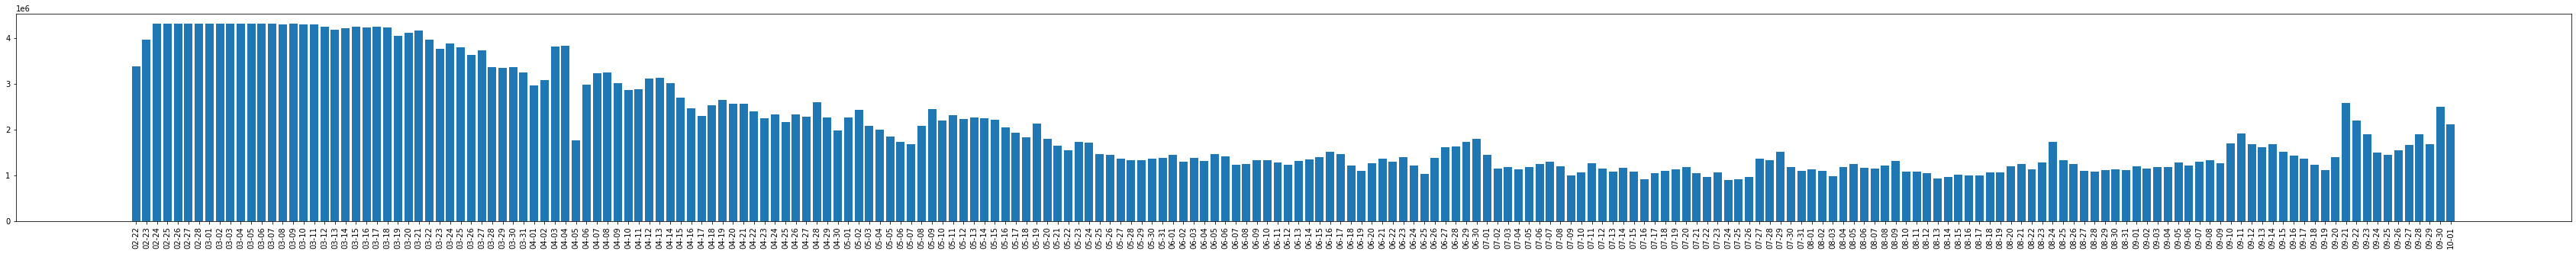

In [31]:
names = list(tweets_per_day_ordered.keys())
values = list(tweets_per_day_ordered.values())
plt.figure(figsize=(60,5))
plt.bar(range(len(tweets_per_day_ordered)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

In [34]:
sum(tweets_per_day_ordered.values())

454488445

In [46]:
tweets_per_day_ordered

OrderedDict([('02-22', 3375914),
             ('02-23', 3960707),
             ('02-24', 4314664),
             ('02-25', 4315467),
             ('02-26', 4316173),
             ('02-27', 4309601),
             ('02-28', 4315575),
             ('03-01', 4312357),
             ('03-02', 4315036),
             ('03-03', 4311652),
             ('03-04', 4316221),
             ('03-05', 4318568),
             ('03-06', 4317822),
             ('03-07', 4310557),
             ('03-08', 4306985),
             ('03-09', 4310265),
             ('03-10', 4307671),
             ('03-11', 4296853),
             ('03-12', 4256930),
             ('03-13', 4184964),
             ('03-14', 4223447),
             ('03-15', 4255983),
             ('03-16', 4230062),
             ('03-17', 4245945),
             ('03-18', 4232831),
             ('03-19', 4053362),
             ('03-20', 4118235),
             ('03-21', 4174265),
             ('03-22', 3966133),
             ('03-23', 3768739),
          

In [47]:
454488445/10000000

45.4488445

In [51]:
total_tweets_we_need = 10000000
fraction_we_need_to_sample = defaultdict(int)
for day, num_tweets in tqdm(tweets_per_day_ordered.items()):
    fraction_we_need_to_sample[day] = (num_tweets*10000000)//454488445

100%|█████████████████████████████████████| 222/222 [00:00<00:00, 685666.78it/s]


In [58]:
np.save("fraction_we_need_to_sample.npy", fraction_we_need_to_sample)

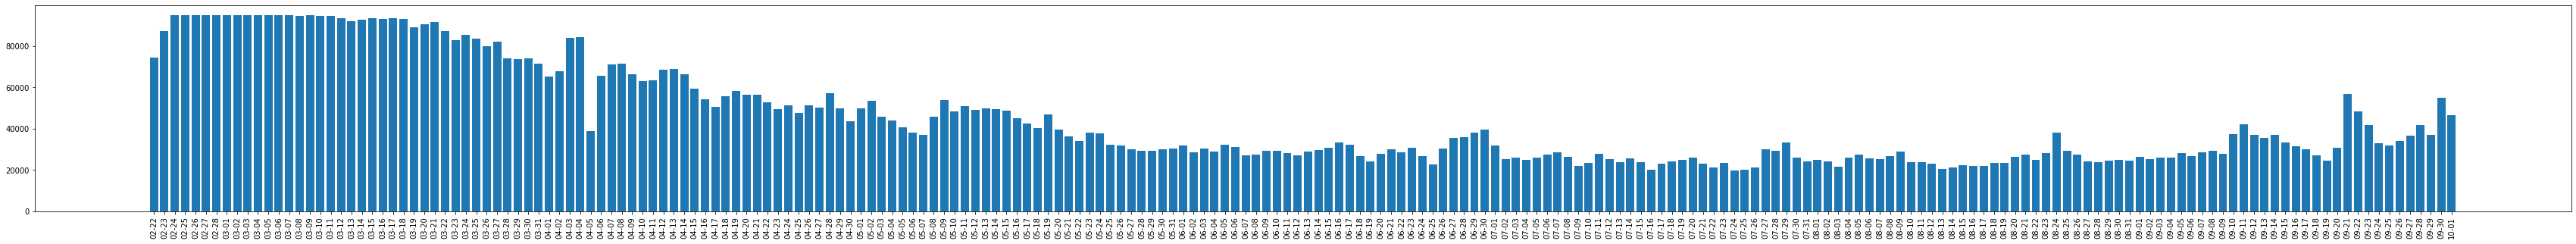

In [59]:
names = list(fraction_we_need_to_sample.keys())
values = list(fraction_we_need_to_sample.values())
plt.figure(figsize=(60,5))
plt.bar(range(len(fraction_we_need_to_sample)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

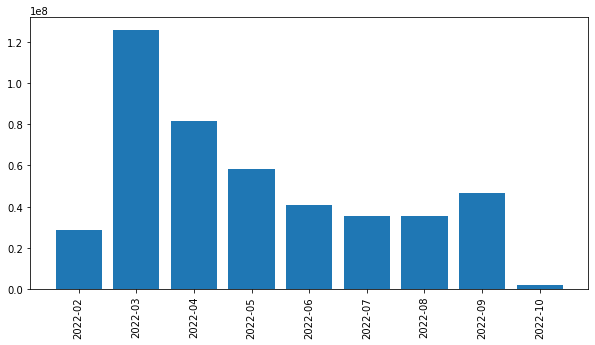

In [33]:
names = list(tweets_per_month_ordered.keys())
values = list(tweets_per_month_ordered.values())
plt.figure(figsize=(10,5))
plt.bar(range(len(tweets_per_month_ordered)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()